In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Problem
# The goal of this project is prdict whether a patient has diabetes or not based on provided diagnostic measures. The model
# should have best efficiency with high accuracy and precision.


In [2]:
# Loda data
healthcare_df = pd.read_csv('C:/Users/ribis/Documents/Simplilearn_Data Scientist/Data-Science-Capstone-Projects-master/Project_2/Project 2/Healthcare - Diabetes/health care diabetes.csv')
#train = pd.read_csv('C:/Users/ribis/Documents/Simplilearn_Data Scientist/Data-Science-Capstone-Projects-master/Project_2/Project 2/train.csv')

In [3]:
healthcare_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Checking for null values
healthcare_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
healthcare_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
healthcare_df.shape

(768, 9)

In [7]:
healthcare_df.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

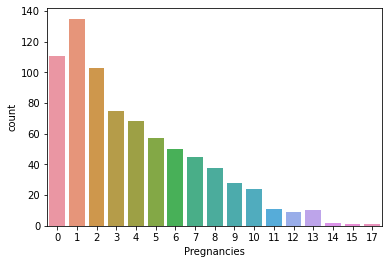

In [8]:
sns.countplot(healthcare_df.Pregnancies)

In [9]:
# maximum number of preganicies is 1 and 2 and not having pregnancies is also significant, howerver some dataset shows preganancies
# more than 13 times

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

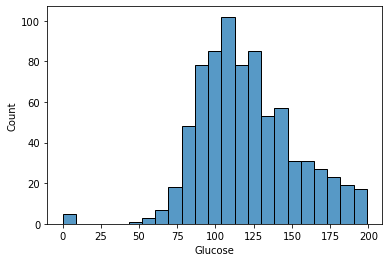

In [10]:
sns.histplot(healthcare_df.Glucose)

In [11]:
# skewness of glucose
healthcare_df.Glucose.skew()

0.17375350179188992

In [12]:
# Checking which columns has o values
print('Columns that contains zero values')
print('---------------------------------')
healthcare_df[healthcare_df!=0].columns

Columns that contains zero values
---------------------------------


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

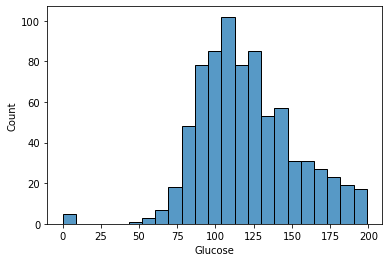

In [13]:
# Checking distribution of Glucose data
sns.histplot(healthcare_df.Glucose)

In [14]:
# Replacing zero values with mean of the glucose column
healthcare_df.Glucose = healthcare_df.Glucose.replace(0, healthcare_df.Glucose.mean())

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

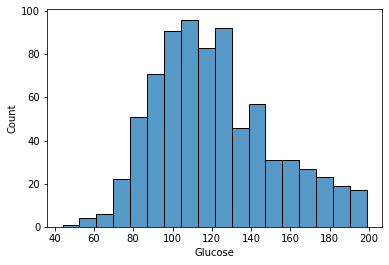

In [15]:
# After removing zeor values
sns.histplot(healthcare_df.Glucose)

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

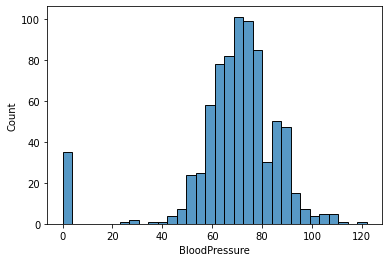

In [16]:
# Checking blood sugar
sns.histplot(healthcare_df.BloodPressure)

In [17]:
healthcare_df.BloodPressure = healthcare_df.BloodPressure.replace(0, healthcare_df.BloodPressure.mean())

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

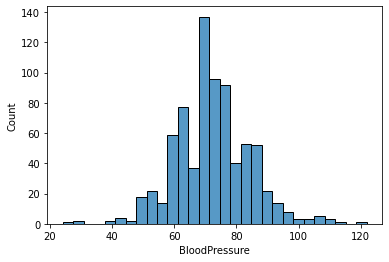

In [18]:
sns.histplot(healthcare_df.BloodPressure)

In [19]:
# distribution after removing zeros
healthcare_df.BloodPressure = healthcare_df.BloodPressure

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

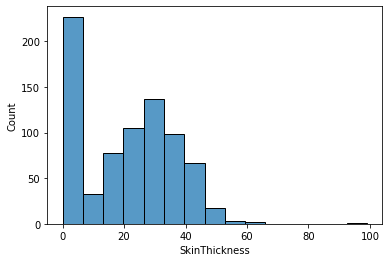

In [20]:
sns.histplot(healthcare_df.SkinThickness)

In [21]:
healthcare_df.SkinThickness.mean(), healthcare_df.SkinThickness.std()

(20.536458333333332, 15.952217567727677)

In [22]:
# Replacing zeors of skinthickness column
import random
lst=[]
for val in range(17, 35, 1):
    lst.append(val)
    
healthcare_df.SkinThickness = healthcare_df.SkinThickness.replace(0, random.choice(lst), regex=True)

In [23]:
random.choice(lst)

23

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

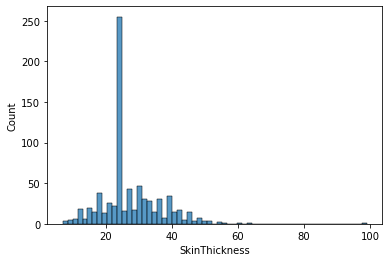

In [24]:
# Distribution of skinthikness column after replacing zero values
sns.histplot(healthcare_df.SkinThickness)

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

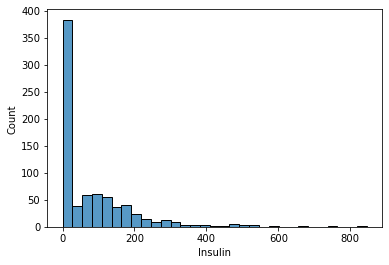

In [25]:
sns.histplot(healthcare_df.Insulin)

In [26]:
healthcare_df.Insulin.value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
193      1
191      1
188      1
184      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [27]:
x = healthcare_df.SkinThickness.mean()
healthcare_df.Insulin = healthcare_df.Insulin.replace(0, x)

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

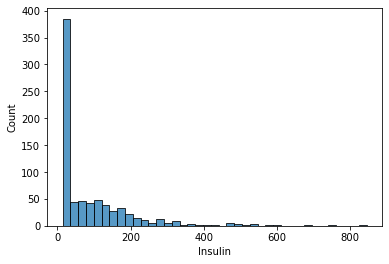

In [28]:
sns.histplot(healthcare_df.Insulin)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

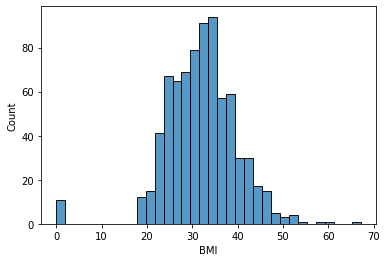

In [29]:
# BMI histogram showing data distribution
sns.histplot(healthcare_df.BMI)

In [30]:
# Replacing zeros value with mean
x = healthcare_df.BMI.mean()
healthcare_df.BMI = healthcare_df.BMI.replace(0, x)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

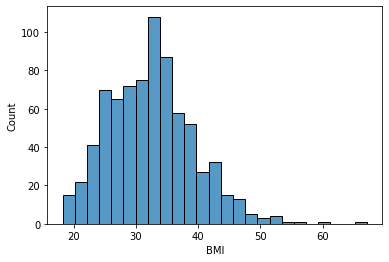

In [31]:
# After replacing zeors histogram
sns.histplot(healthcare_df.BMI)

In [32]:
healthcare_df.BMI.min(), healthcare_df.BMI.max(), 

(18.2, 67.1)

In [33]:
healthcare_df.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

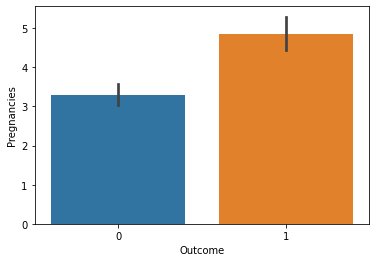

In [34]:
sns.barplot(healthcare_df.Outcome, healthcare_df.Pregnancies)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

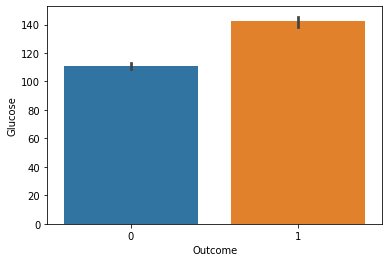

In [35]:
sns.barplot(healthcare_df.Outcome, healthcare_df.Glucose)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

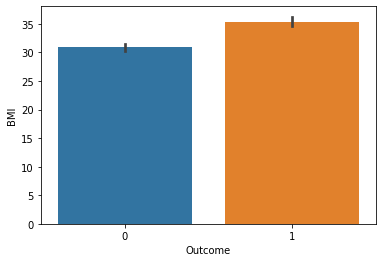

In [36]:
sns.barplot(healthcare_df.Outcome, healthcare_df.BMI)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

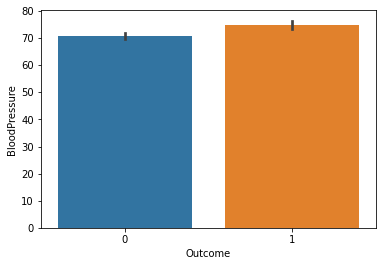

In [37]:
sns.barplot(healthcare_df.Outcome, healthcare_df.BloodPressure)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

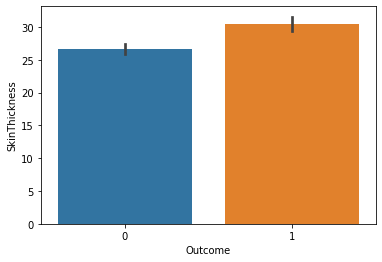

In [38]:
sns.barplot(healthcare_df.Outcome, healthcare_df.SkinThickness)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

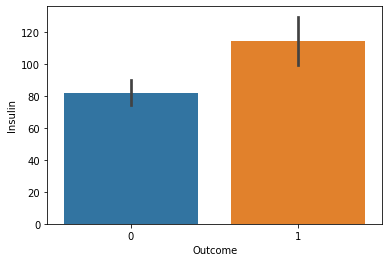

In [39]:
sns.barplot(healthcare_df.Outcome, healthcare_df.Insulin)

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

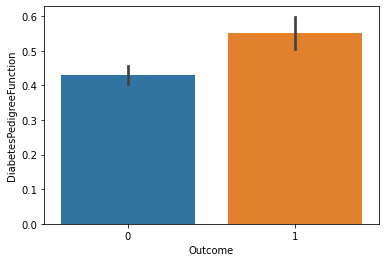

In [40]:
sns.barplot(healthcare_df.Outcome, healthcare_df.DiabetesPedigreeFunction)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

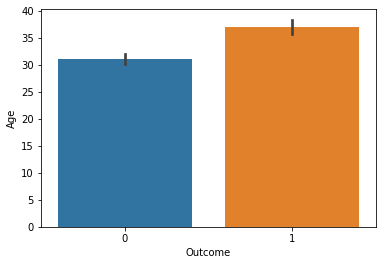

In [41]:
sns.barplot(healthcare_df.Outcome, healthcare_df.Age)

<AxesSubplot:>

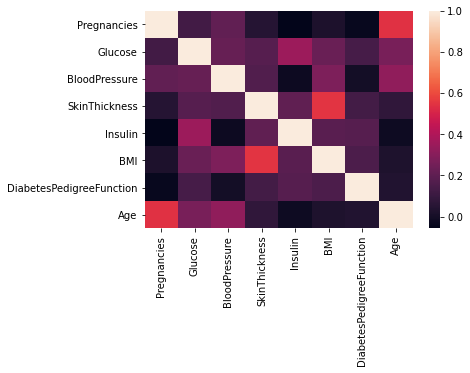

In [42]:
# checking correlation between variable
corr_feature = healthcare_df.drop('Outcome', axis=1)
sns.heatmap(corr_feature.corr())

In [43]:
# Insulin and Glucose are most correlated to eachother among the variable

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

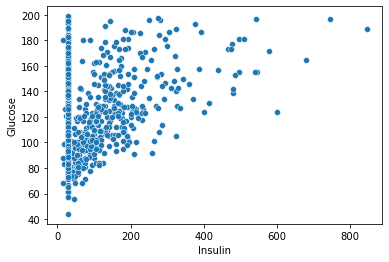

In [44]:
sns.scatterplot(healthcare_df.Insulin, healthcare_df.Glucose)

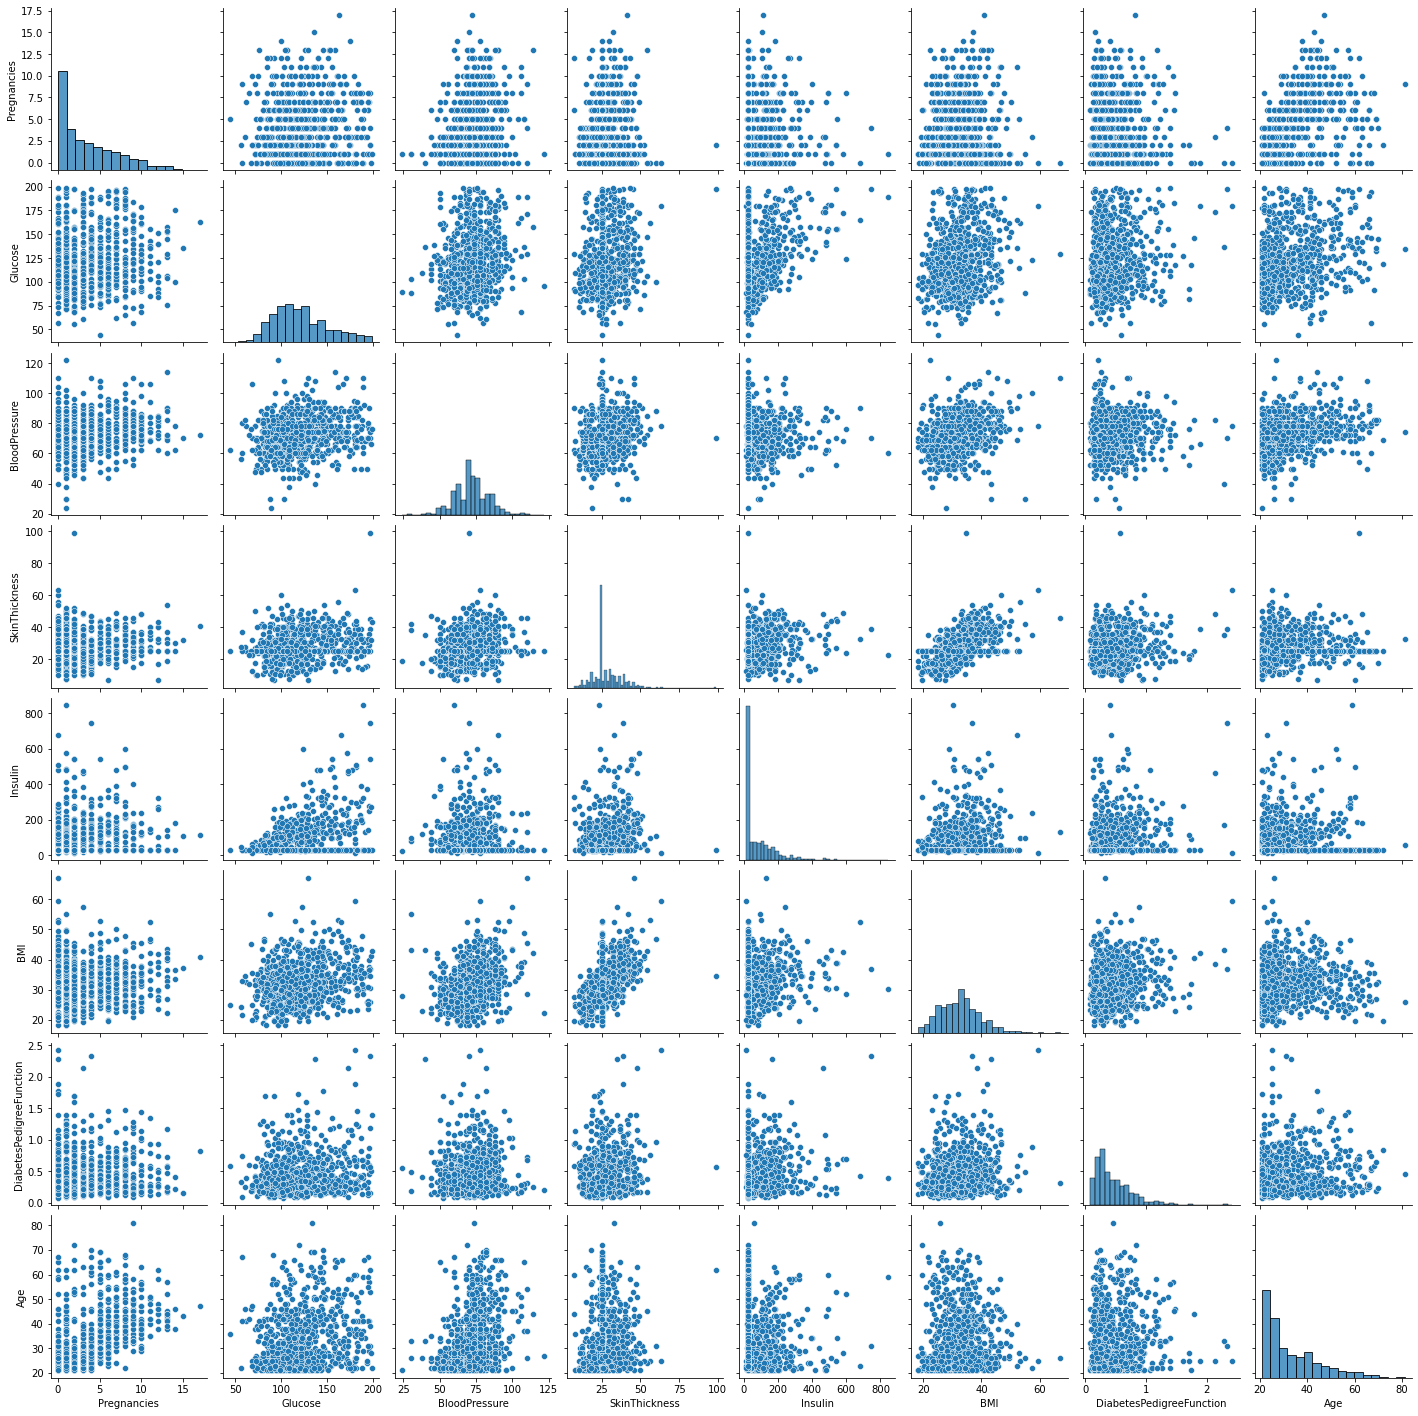

In [45]:
sns.pairplot(corr_feature)

In [46]:
# The pairplot above shows that glucose has postive correlation with insulin and Blood Presseure, and less postive correlation with 
# diabetes. Similarly, Blood pressure has positive relation with glucose and negative relation with insulin. 

In [47]:
healthcare_df.select_dtypes(float).columns

Index(['Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction'],
      dtype='object')

In [48]:
healthcare_df.Pregnancies = pd.cut(healthcare_df.Pregnancies, bins=[0,4,8,18], 
                                   labels=['1','2','3'], include_lowest=True)

In [49]:
healthcare_df.Glucose.min(), healthcare_df.Glucose.max()

(44.0, 199.0)

In [50]:
healthcare_df.Glucose=healthcare_df.Glucose.astype(int)

In [51]:
#healthcare_df.Glucose = pd.cut(healthcare_df.Glucose, bins=[40,80,120,160,200],
                              #labels=['1','2','3','4'], include_lowest=True)


In [52]:
healthcare_df.BloodPressure=healthcare_df.BloodPressure.astype(int)

In [53]:
#healthcare_df.BloodPressure = pd.cut(healthcare_df.BloodPressure, bins=[40,80,120,160,200],
                              #labels=['1','2','3','4'], include_lowest=True)

In [54]:
healthcare_df.BMI = healthcare_df.BMI.astype(int)

In [55]:
healthcare_df.BMI = pd.cut(healthcare_df.BMI, bins=[15,40,70], include_lowest=True, 
                           labels=['1', '2'])

In [56]:
healthcare_df.SkinThickness = pd.cut(healthcare_df.SkinThickness, bins=[0,25,50,100], include_lowest=True, 
                           labels=['1', '2', '3'])

In [57]:
healthcare_df.Insulin = healthcare_df.Insulin.astype(int)

In [58]:
#healthcare_df.Insulin = pd.cut(healthcare_df.Insulin, bins=[10,50,100,200,300,800], include_lowest=True, 
                          #labels=['1', '2', '3', '4', '5'])

In [59]:
healthcare_df.DiabetesPedigreeFunction = healthcare_df.DiabetesPedigreeFunction.astype(int)

In [60]:
#healthcare_df.DiabetesPedigreeFunction = pd.cut(healthcare_df.DiabetesPedigreeFunction, bins=[0,0.025,0.5,0.75,1,2.5], 
                                               #include_lowest=True, labels=['1', '2', '3', '4', '5'])

In [61]:
healthcare_df.Age = pd.cut(healthcare_df.Age, bins=[20,30,50,80], include_lowest=True, 
                           labels=['1', '2', '3'])

In [62]:
healthcare_df[healthcare_df!=0].columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [63]:
healthcare_df.to_csv('C:/Users/ribis/Documents/Simplilearn_Data Scientist/Data-Science-Capstone-Projects-master/Project_2/Project 2/Healthcare - Diabetes/healthcare_df.csv', index=False)

In [64]:
category = healthcare_df.columns


In [65]:
category = ['Pregnancies', 'BMI', 'SkinThickness', 'Age']


In [66]:
dummies_df = pd.get_dummies(healthcare_df, columns=category, drop_first=True)

In [67]:
dummies_df.head()

,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Outcome,Pregnancies_2,Pregnancies_3,BMI_2,SkinThickness_2,SkinThickness_3,Age_2,Age_3
0,148,72,27,0,1,1,0,0,1,0,1,0
1,85,66,27,0,0,0,0,0,1,0,1,0
2,183,64,27,0,1,1,0,0,0,0,1,0
3,89,66,94,0,0,0,0,0,0,0,0,0
4,137,40,168,2,1,0,0,1,1,0,1,0


In [68]:
dummies_df.shape

(768, 12)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

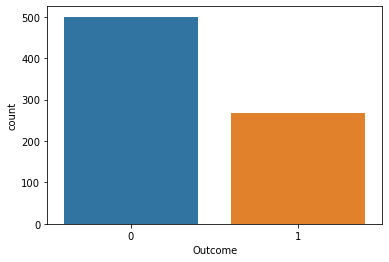

In [69]:
# Looking for the outcome data distribution
sns.countplot(dummies_df.Outcome)

In [70]:
# It appears that there is an imbalance in data distribution as the model will be trained with more data that shows 0 and could
# biased. For this, we need to balance the data either using oversampling or undersampling strategies

# Logistic Regresson Model

In [71]:
X = dummies_df.drop('Outcome', axis=1)
y = dummies_df['Outcome']

In [72]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X,y)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

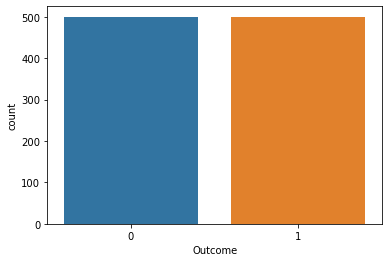

In [73]:
# Checking data distribution after applying oversampling strategy
sns.countplot(y_over)

In [74]:
# Splitting data into train and test datasets

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size=0.2, random_state=5)

In [76]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [77]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train_ss, y_train)
y_model_lr_train_pred = model_lr.predict(X_train_ss)
y_model_lr_test_pred = model_lr.predict(X_test_ss)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [79]:
print('The accuracy score of train dataset is:', accuracy_score(y_model_lr_train_pred, y_train))
print('The accuracy score of test dataset is:', accuracy_score(y_model_lr_test_pred, y_test))


The accuracy score of train dataset is: 0.75125
The accuracy score of test dataset is: 0.735


In [80]:
print(classification_report(y_model_lr_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        98
           1       0.75      0.72      0.73       102

    accuracy                           0.73       200
   macro avg       0.74      0.74      0.73       200
weighted avg       0.74      0.73      0.73       200



In [81]:
confusion_matrix(y_model_lr_test_pred, y_test)

array([[74, 24],
       [29, 73]], dtype=int64)

In [82]:
# Applying K-fold cross validation 
# Here I want to check the accuracy of the model whether the model is overfitting or underfitting and letting to know 
# quality of the model and then help in model selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k=5
kf = KFold(n_splits=k, random_state=None)
model = model_lr
result = cross_val_score(model_lr, X_over,y_over)

In [83]:
print('Accuracy of each fold are:', result)
print('Average accuracy is:', np.round(result.mean(), decimals=2))

Accuracy of each fold are: [0.71  0.675 0.785 0.785 0.755]
Average accuracy is: 0.74


In [84]:
from sklearn.neighbors import KNeighborsClassifier
lst=[]
for i in  range(1,30,2):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train_ss, y_train)
    #y_model_knn_train_pred = model_knn.predict(X_train)
    y_model_knn_test_pred = model_knn.predict(X_test_ss)
    lst.append(np.mean(y_model_knn_test_pred != y_test))

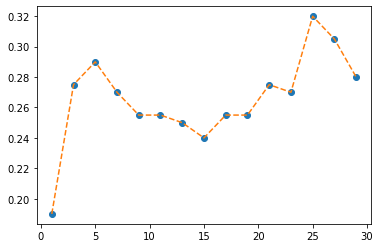

In [85]:
plt.plot(range(1,30,2),lst, 'o')
plt.plot(range(1,30,2), lst, '--')

In [86]:
model_knn_1 = KNeighborsClassifier(n_neighbors=1)
model_knn_1.fit(X_train_ss, y_train)
y_model_knn_train_pred_1 = model_knn_1.predict(X_train_ss)
y_model_knn_test_pred_1 = model_knn_1.predict(X_test_ss)

In [87]:
print('The accuracy score of train dataset is:', accuracy_score(y_model_knn_train_pred_1, y_train))
print('The accuracy score of test dataset is:', accuracy_score(y_model_knn_test_pred_1, y_test))

The accuracy score of train dataset is: 0.99625
The accuracy score of test dataset is: 0.81


In [88]:
confusion_matrix(y_model_knn_test_pred_1, y_test)

array([[79, 14],
       [24, 83]], dtype=int64)

In [89]:
from sklearn.model_selection import cross_val_score, KFold
k = 5
kf = KFold(n_splits=5, random_state=None)
model = model_knn_1
result_knn = cross_val_score(model, X_over, y_over)

In [90]:
print('Accuracy of each fold are:', result_knn)
print('Average accuracy is:',np.round( result_knn.mean(), decimals=2))

Accuracy of each fold are: [0.785 0.76  0.83  0.875 0.83 ]
Average accuracy is: 0.82


In [91]:
#!pip install XGBoost

In [92]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train_ss, y_train)
y_model_xgb_train_pred_1 = model_xgb.predict(X_train_ss)
y_model_xgb_test_pred_1 = model_xgb.predict(X_test_ss)

[17:35:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [93]:
print('The accuracy score of train dataset is:', accuracy_score(y_model_xgb_train_pred_1, y_train))
print('The accuracy score of test dataset is:', accuracy_score(y_model_xgb_test_pred_1, y_test))

The accuracy score of train dataset is: 0.9925
The accuracy score of test dataset is: 0.8


In [94]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train_ss,y_train)
y_model_dtc_train_pred_1 = model_dtc.predict(X_train_ss)
y_model_dtc_test_pred_1 = model_dtc.predict(X_test_ss)

In [95]:
print('The accuracy score of train dataset is:', accuracy_score(y_model_dtc_train_pred_1, y_train))
print('The accuracy score of test dataset is:', accuracy_score(y_model_dtc_test_pred_1, y_test))

The accuracy score of train dataset is: 0.9975
The accuracy score of test dataset is: 0.775


In [96]:
confusion_matrix(y_model_dtc_test_pred_1, y_test)

array([[76, 18],
       [27, 79]], dtype=int64)

In [97]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_ss, y_train)
y_model_rf_train_pred_1 = model_rf.predict(X_train_ss)
y_model_rf_test_pred_1 = model_rf.predict(X_test_ss)

In [98]:
print('The accuracy score of train dataset is:', accuracy_score(y_model_rf_train_pred_1, y_train))
print('The accuracy score of test dataset is:', accuracy_score(y_model_rf_test_pred_1, y_test))

The accuracy score of train dataset is: 0.9975
The accuracy score of test dataset is: 0.815


In [99]:
k = 5
kf_rf = KFold()
result_rf = cross_val_score(model_rf, X_over, y_over)

In [100]:
print('Accuracy of each fold are:', result_rf)
print('Average accuracy is:',np.round( result_rf.mean(), decimals=2))

Accuracy of each fold are: [0.835 0.78  0.82  0.91  0.885]
Average accuracy is: 0.85


In [101]:
print(classification_report(y_model_rf_test_pred_1, y_test))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        88
           1       0.89      0.77      0.82       112

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.83      0.81      0.82       200



In [102]:
# Here the precision is 0.79 which is the accuracy of determining no diabetes but recall is 0.9 which means stil there is 10%
# chance of predicting false negative for non-diabetic gorup which are predicted as diabetic patient that is not good. There is
# a room for improvemnet.
# Similalry, precision for diabetic gorup is 0.91, means model can predict quite accurately but 9% may be false posive case,
# atten may require that patient may go to same treatment as true positve diabetic patients. Recall for the diabetic group is
# 0.8 which means 20% case me be fasle negative which means model predict 20% as non-diabetic. Still there is a room for improvement
# f1-score is closer to 1 which is a harmonic mean of precision and accuracy that shows how better is the model. Based on the 
# f1-score this model is good. Support represents actual number of cases occurs in each condtion.

In [103]:
# ROC and AUC curve
# Now, here I wanted to check the model overall accuracy interms of true postive rate (TPR) and false positive rate (FPR)
# that helpst to predict the overall accuracy of the model and how good it is. In general, ROC curve represents graph between
# x-axis as 1-specificity and y-axis as sensitivity with a cutoff value. Each point in ROC curve represnts fraction of true 
# positve and false posive. Hence, if the accuracy score is above 0.8 the model is good but still some false postive exists which
# is very important in a clinical test. Therefore, given the sensitivity of the data there is trade-off between TPR and FPR. In this case where
# The area under the ROC curve represents the goodness of the model and a good model covers most fraction of that area.

In [104]:
from sklearn.metrics import roc_auc_score, roc_curve
rf_probs = model_rf.predict_proba(X_test_ss)
knn_probs = model_knn_1.predict_proba(X_test_ss)

In [105]:
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_probs[:,1])
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn_probs[:,1])

In [106]:
rf_roc_auc = roc_auc_score(y_test, rf_probs[:, 1])
knn_roc_auc = roc_auc_score(y_test, knn_probs[:,1])

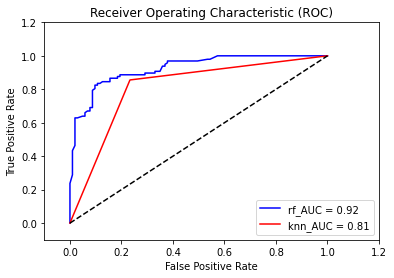

In [107]:
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(rf_fpr, rf_tpr, 'b',
        label='rf_AUC = %0.2f'% rf_roc_auc)
plt.plot(knn_fpr, knn_tpr, 'r',
        label='knn_AUC = %0.2f'% knn_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [108]:
# The Roc curve dispalyed that the randomforest model has the highest accuracy which is 0.92. This is a very good model as 
# accuracy score is above 0.92, but should be careful to false positive cases as it still occurs using this model.

In [110]:
# From above models RandomForest models perform best so I am going to deploy this model.